In [120]:

import  os,warnings, sys, shutil, torch, os, numpy as np, math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE


warnings.filterwarnings("ignore")
import pickle
path = os.path.dirname(os.getcwd())
# os.chdir('/workspaces/classification_yishai/transformers/')
# path = '/workspaces/classification_yishai/mutual_functions/'
sys.path.insert(0,path + '/mutual_functions/' )
data_path = path + '/mutual_functions/data/' 
from usefull_functions import *
from evaluation_functions import *
from imbalance import *




# reload packages with new changes
%load_ext autoreload
%autoreload 2



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [79]:
prop = {'dataset':'AF', #'shortTracks.pkl
        
        
        'norm':'MinMaxScale', #'MinMaxScale' # 'mean_standardize', 
        'n_step':20, 
        'LEN': None,#2
        'task_type':'classification', # 'classification' # 'regression'

        
        'data_path' : data_path,


}

In [121]:
X_train, y_train, X_test, y_test,X_val,y_val = loadData(prop,prop['data_path'],val_size=0.5)




Data loading start...
n_step: 20
data columns ['3', '2']
clssified by:  type
preprocessing data using MinMaxScale complete...
data shape:  (14904, 20, 2) (14904,) (1863, 20, 2) (1863,)


imbalance (6804, 20, 2) (6804,)


<Axes: ylabel='Probability'>

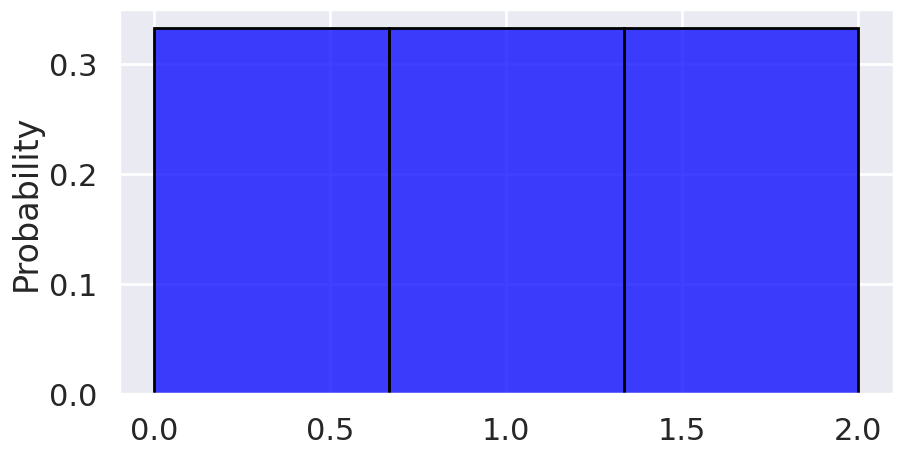

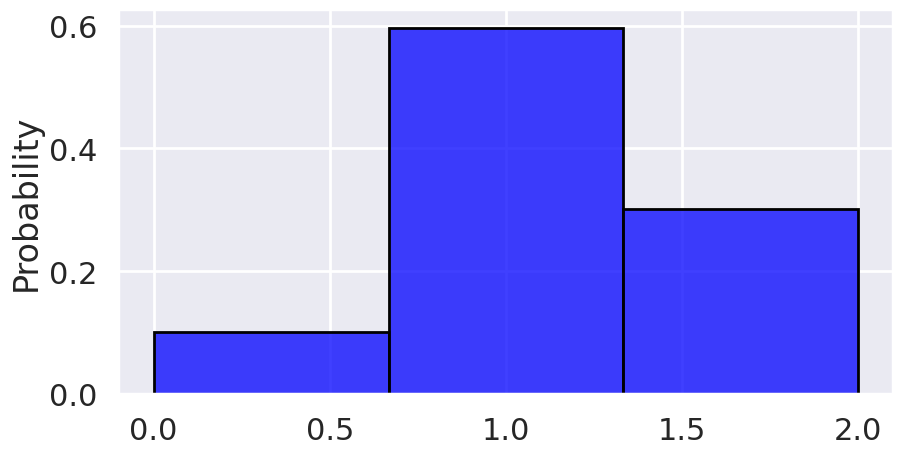

In [140]:
ind_imbalance = imbalance_data(y_train)
y_imbalance = y_train[ind_imbalance]
X_imbalance = X_train[ind_imbalance]
print('imbalance',X_imbalance.shape,y_imbalance.shape)




plt.figure(figsize=(10,5))
sns.histplot(y_train, bins=np.unique(y_train).shape[0],stat='probability',
                edgecolor="k", linewidth=2,color='b')
plt.figure(figsize=(10,5))
sns.histplot(y_imbalance, bins=np.unique(y_imbalance).shape[0],stat='probability',
                edgecolor="k", linewidth=2,color='b')



upsampling
upsample (8114, 20, 2) (8114,)
downsampling
downsample (4108, 20, 2) (4108,)


<Axes: ylabel='Probability'>

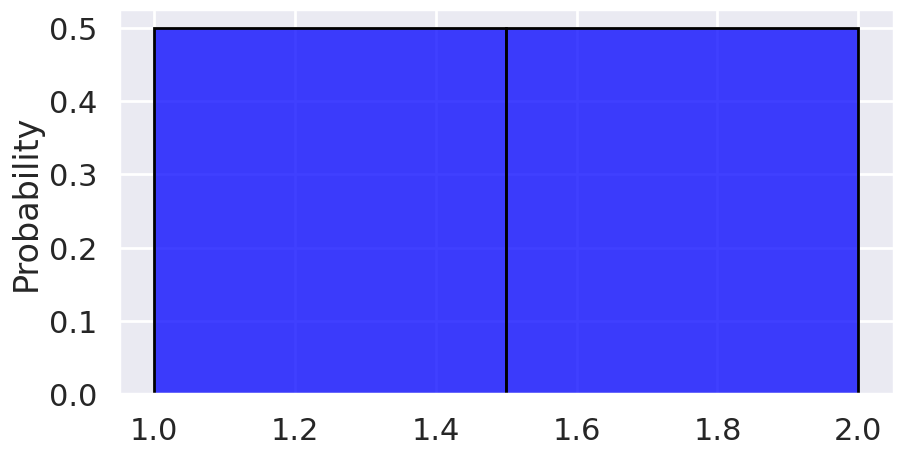

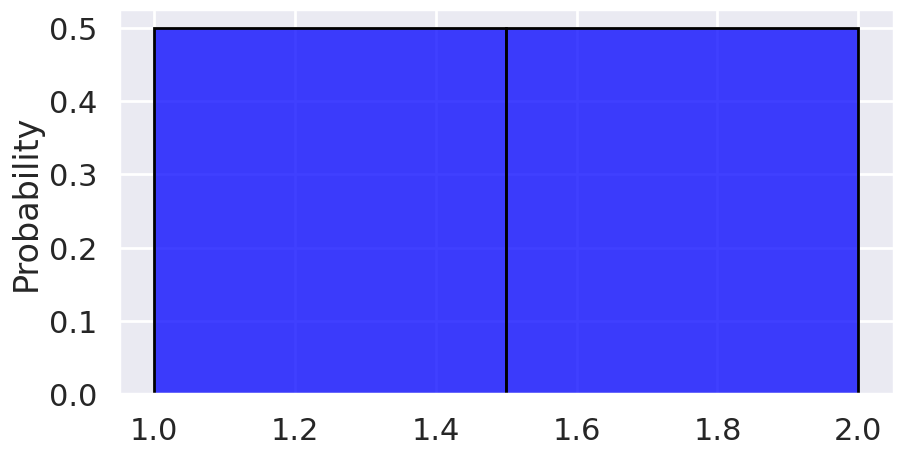

In [143]:
ind_up = Sample(y_imbalance,upsampled = True,minPercentage = 0.2)
y_up = y_imbalance[ind_up]
X_up = X_imbalance[ind_up]
print('upsample',X_up.shape,y_up.shape)

ind_down = Sample(y_imbalance,upsampled = False,minPercentage = 0.2)
y_down = y_imbalance[ind_down]
X_down = X_imbalance[ind_down]
print('downsample',X_down.shape,y_down.shape)

plt.figure(figsize=(10,5))
sns.histplot(y_up, bins=np.unique(y_up).shape[0],stat='probability',
                edgecolor="k", linewidth=2,color='b')
plt.figure(figsize=(10,5))
sns.histplot(y_down, bins=np.unique(y_down).shape[0],stat='probability',
                edgecolor="k", linewidth=2,color='b')

v1
ham     4825
spam     747
Name: count, dtype: int64
(4825, 2)
(747, 2)


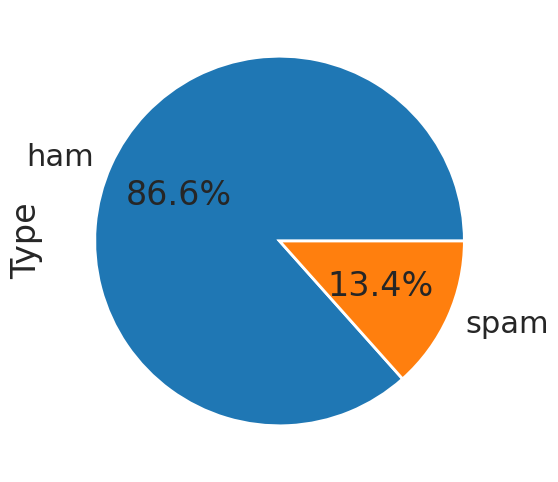

In [57]:
# https://wellsr.com/python/upsampling-and-downsampling-imbalanced-data-in-python/#:~:text=Upsampling%20refers%20to%20manually%20adding,create%20a%20more%20balanced%20dataset.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_style("darkgrid")
sns.set_context("poster")
plt.rcParams["figure.figsize"] = [8,6]

spam_dataset = pd.read_csv(r"spam.csv", encoding = 'latin')
spam_dataset = spam_dataset[["v1", "v2"]]
# print(spam_dataset.head())

print(spam_dataset["v1"].value_counts())

spam_dataset.groupby('v1').size().plot(kind='pie',
                                       y = "v1",
                                       label = "Type",
                                       autopct='%1.1f%%')

ham_messages = spam_dataset[spam_dataset["v1"] == "ham"]
spam_messages  = spam_dataset[spam_dataset["v1"] == "spam"]
print(ham_messages.shape)
print(spam_messages.shape)


v1
0    4825
1    4825
Name: count, dtype: int64


<Axes: ylabel='Type'>

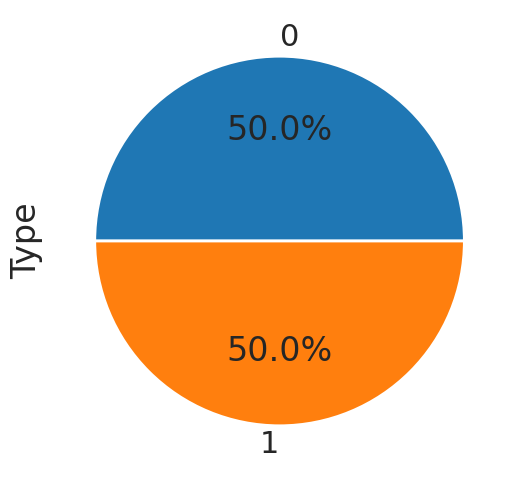

In [58]:

# Synthetic Minority Oversampling Technique (SMOTE) 
# is an oversampling technique that generates synthetic samples
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(spam_dataset ['v2'])

spam_dataset['v1'] = spam_dataset['v1'].map({'ham': 0, 'spam': 1})
spam_dataset.head()
y = spam_dataset[['v1']]


su = SMOTE(random_state=42)

X_su, y_su = su.fit_resample(X, y)

print(y_su["v1"].value_counts())

y_su.groupby('v1').size().plot(kind='pie',
                                       y = "v1",
                                       label = "Type",
                                       autopct='%1.1f%%')

In [69]:
corpus = [
     'This is the first document.',
     'This document is the second document.',
     'And this is the third one.',
    'Is this the first document?',
 ]
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
print(X)

  (0, 1)	0.46979138557992045
  (0, 2)	0.5802858236844359
  (0, 6)	0.38408524091481483
  (0, 3)	0.38408524091481483
  (0, 8)	0.38408524091481483
  (1, 5)	0.5386476208856763
  (1, 1)	0.6876235979836938
  (1, 6)	0.281088674033753
  (1, 3)	0.281088674033753
  (1, 8)	0.281088674033753
  (2, 4)	0.511848512707169
  (2, 7)	0.511848512707169
  (2, 0)	0.511848512707169
  (2, 6)	0.267103787642168
  (2, 3)	0.267103787642168
  (2, 8)	0.267103787642168
  (3, 1)	0.46979138557992045
  (3, 2)	0.5802858236844359
  (3, 6)	0.38408524091481483
  (3, 3)	0.38408524091481483
  (3, 8)	0.38408524091481483


upsampling
downsampling


<Axes: ylabel='Count'>

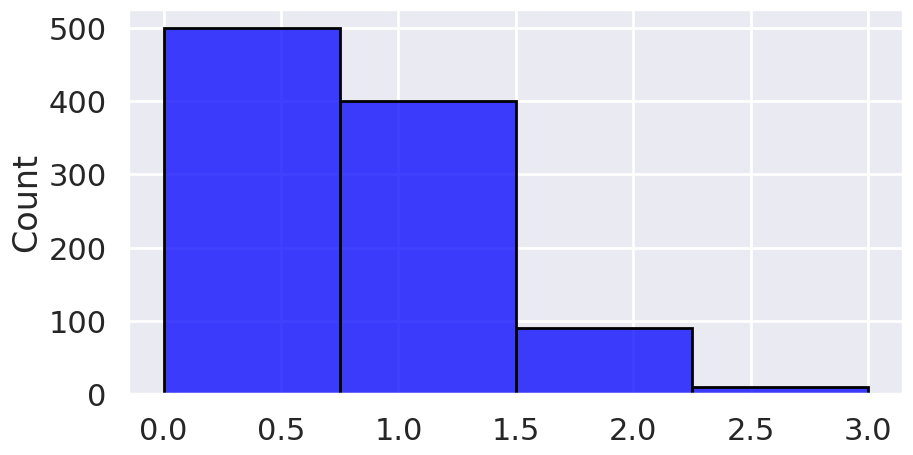

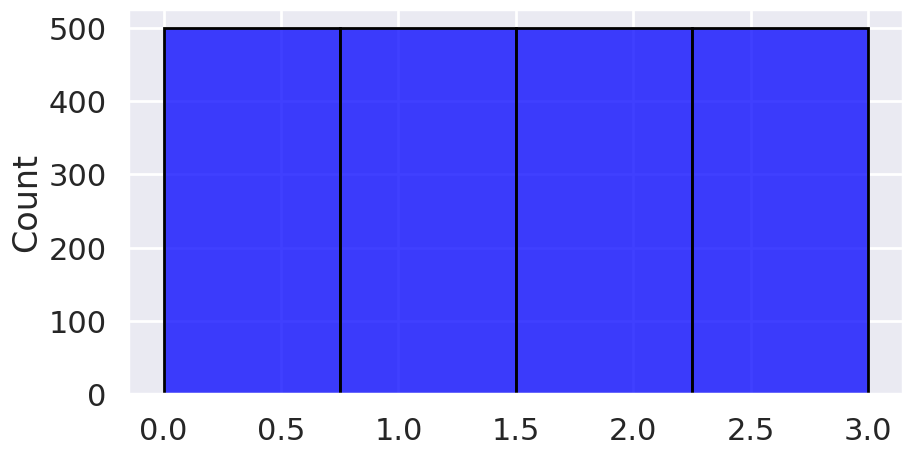

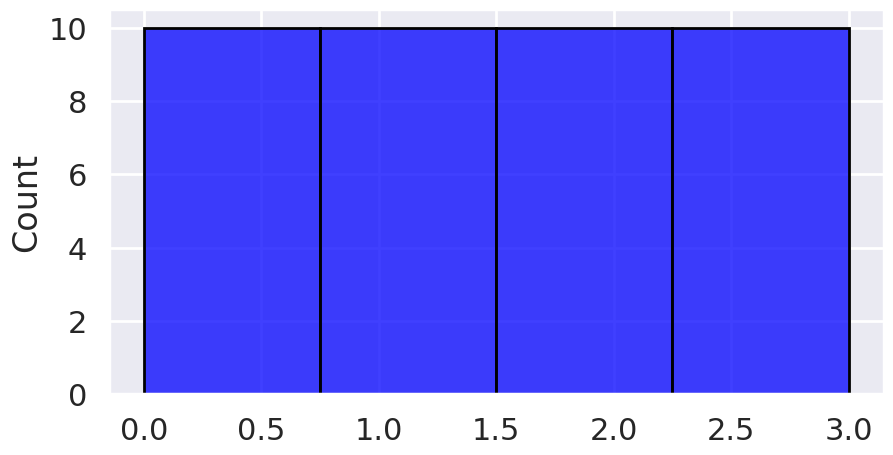